<h1 style="color:gray;font-family:segoe ui">IRIS – HIERARCHICAL FISHER PROJECTIONS</h1>
<hr>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
iris = pd.read_csv("IRIS/train.csv")
display(iris.shape)
iris = iris.iloc[:,1:]
iris.head()

(87, 6)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,5.0,3.6,1.4,0.2,setosa
4,4.6,3.4,1.4,0.3,setosa


In [3]:
iris.iloc[:,:-1] = (iris.iloc[:,:-1]-iris.iloc[:,:-1].mean())/iris.iloc[:,:-1].std()

In [4]:
iris.Species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

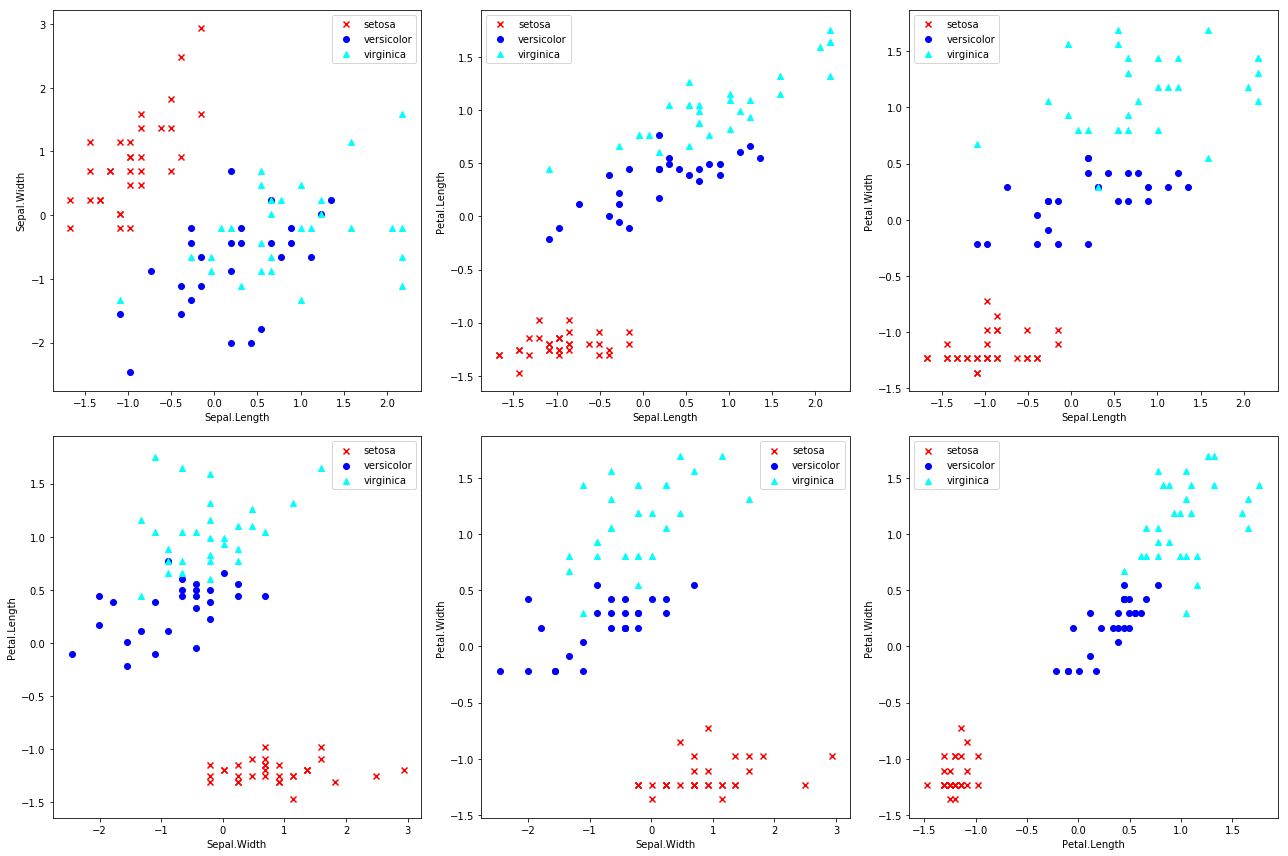

In [5]:
fig, axes = plt.subplots(nrows=2,ncols=3,figsize=(18,12))
temp = axes.flatten()
x = 0
for i in range(3):
    for j in range(i+1,4):
        temp[x].scatter(iris[iris['Species'] == 'setosa'].iloc[:,i],\
                        iris[iris['Species'] == 'setosa'].iloc[:,j], c='r', label='setosa', edgecolors=None, marker="x")
        temp[x].scatter(iris[iris['Species'] == 'versicolor'].iloc[:,i],\
                        iris[iris['Species'] == 'versicolor'].iloc[:,j], c='b', label='versicolor', edgecolors=None, marker="o")
        temp[x].scatter(iris[iris['Species'] == 'virginica'].iloc[:,i],\
                        iris[iris['Species'] == 'virginica'].iloc[:,j], c='cyan', label='virginica', edgecolors=None, marker="^")
        temp[x].legend()
        temp[x].set_xlabel(iris.columns[i])
        temp[x].set_ylabel(iris.columns[j])
        x += 1
fig.tight_layout()

In [6]:
iris['Meta'] = iris['Species'].apply(lambda x: x if x == 'setosa' else "combined")
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,Meta
0,-0.856775,0.917113,-1.253445,-1.233873,setosa,setosa
1,-1.089711,-0.206673,-1.253445,-1.233873,setosa,setosa
2,-1.322647,0.242841,-1.308161,-1.233873,setosa,setosa
3,-0.973243,1.141870,-1.253445,-1.233873,setosa,setosa
4,-1.439115,0.692356,-1.253445,-1.106685,setosa,setosa


In [7]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

<h2 style="color:gray;font-family:segoe ui">FIRST FISHER PROJECTION</h2>
<hr>

In [8]:
clf = LinearDiscriminantAnalysis(solver='eigen',n_components=1)
X_fit = clf.fit(iris.iloc[:,:-2],iris.iloc[:,-1]).transform(iris.iloc[:,:-2])

result = iris[['Meta']]
result['X'] = X_fit
result.head()

c:\users\ke381281.wipro\appdata\local\continuum\miniconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,Meta,X
0,setosa,-1.663328
1,setosa,-1.266238
2,setosa,-1.445904
3,setosa,-1.728343
4,setosa,-1.506209


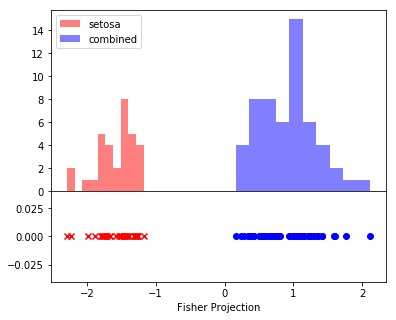

In [9]:
fig, axes = plt.subplots(nrows=2,figsize=(6,5),sharex=True,gridspec_kw = {'height_ratios':[2, 1]})
axList = axes.flatten()

class1 = result[result['Meta'] == 'setosa']
class2 = result[result['Meta'] == 'combined']

axList[1].scatter(class1['X'], np.zeros(class1.shape[0]), c='r', label='setosa', edgecolors=None, marker="x")
axList[1].scatter(class2['X'], np.zeros(class2.shape[0]), c='b', label='combined', edgecolors=None, marker="o")
axList[0].hist(class1['X'], label='setosa', color='r', alpha=0.5)
axList[0].hist(class2['X'], label='combined', color='b', alpha=0.5)

axList[0].legend()
axList[1].set_xlabel("Fisher Projection")
plt.subplots_adjust(hspace=0)

<h2 style="color:gray;font-family:segoe ui">From the plot above, I note that the first Fisher Projection separates the two classes: <span style="color:red;font-family:segoe ui">Setosa</span> and <span style="color:blue;font-family:segoe ui">Combined</span> without any overlap.</h2>
<hr>
<h2 style="color:gray;font-family:segoe ui">Lets find out the Fisher Projection for <span style="color:red">Versicolor</span> and <span style="color:blue">Virginica</span> to check how well does it perform on classes with some overlap.</h2>
<hr>

In [11]:
temp = iris[iris.Species != 'setosa']
clf2 = LinearDiscriminantAnalysis(solver='eigen')
X_fit2 = clf2.fit(temp.iloc[:,:-2],temp.iloc[:,-2]).transform(temp.iloc[:,:-2])

result2 = temp[['Species']]
result2['X'] = X_fit2
result2.head()

c:\users\ke381281.wipro\appdata\local\continuum\miniconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Species,X
32,versicolor,0.232100
33,versicolor,0.394702
34,versicolor,0.439249
35,versicolor,0.490197
36,versicolor,0.538607


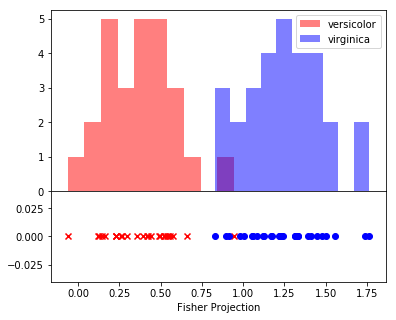

In [12]:
fig, axes = plt.subplots(nrows=2,figsize=(6,5),sharex=True,gridspec_kw = {'height_ratios':[2, 1]})
axList = axes.flatten()

class1 = result2[result2['Species'] == 'versicolor']
class2 = result2[result2['Species'] == 'virginica']

axList[1].scatter(class1['X'], np.zeros(class1.shape[0]), c='r', label='versicolor', edgecolors=None, marker="x")
axList[1].scatter(class2['X'], np.zeros(class2.shape[0]), c='b', label='virginica', edgecolors=None, marker="o")
axList[0].hist(class1['X'], label='versicolor', color='r', alpha=0.5)
axList[0].hist(class2['X'], label='virginica', color='b', alpha=0.5)

axList[0].legend()
axList[1].set_xlabel("Fisher Projection")
plt.subplots_adjust(hspace=0)

<h2 style="color:gray;font-family:segoe ui">From the plot above, we note some overlap between the two classes: <span style="color:red">Versicolor</span> and <span style="color:blue">Virginica</span>. Let us run our discriminants on test data to check if the projections are really effective and useful!</h2>

In [13]:
test = pd.read_csv("IRIS/test.csv")
test = test.iloc[:,1:]

In [14]:
test['first_projection'] = clf.transform(test.iloc[:,:4])
test['second_projection'] = clf2.transform(test.iloc[:,:4])

In [15]:
test.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,first_projection,second_projection
0,4.6,3.1,1.5,0.2,setosa,-0.036474,-0.159208
1,5.4,3.9,1.7,0.4,setosa,-0.145978,-0.164878
2,5.0,3.4,1.5,0.2,setosa,-0.172319,-0.287438
3,4.4,2.9,1.4,0.2,setosa,-0.042514,-0.168553
4,4.8,3.0,1.4,0.1,setosa,-0.135234,-0.335010


<h2 style="color:gray;font-family:segoe ui">Let's combine the two Fisher projections and get a complete picture of separation between the `3` classes.</h2>

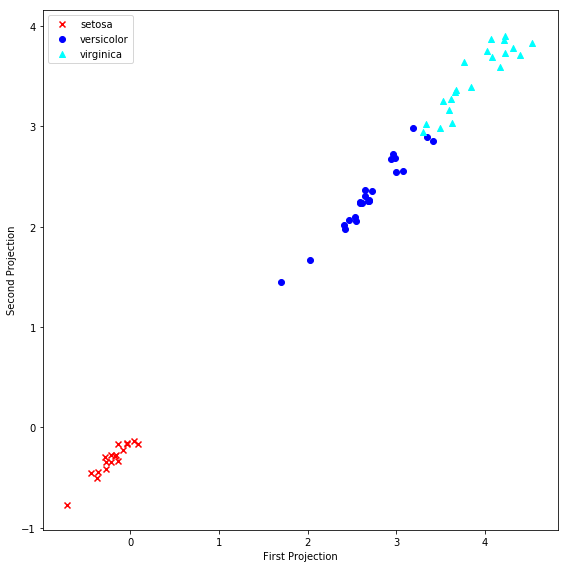

In [16]:
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(test[test['Species'] == 'setosa'].iloc[:,-2],\
                        test[test['Species'] == 'setosa'].iloc[:,-1], c='r', label='setosa', edgecolors=None, marker="x")
ax.scatter(test[test['Species'] == 'versicolor'].iloc[:,-2],\
                        test[test['Species'] == 'versicolor'].iloc[:,-1], c='b', label='versicolor', edgecolors=None, marker="o")
ax.scatter(test[test['Species'] == 'virginica'].iloc[:,-2],\
                        test[test['Species'] == 'virginica'].iloc[:,-1], c='cyan', label='virginica', edgecolors=None, marker="^")
ax.legend()
ax.set_xlabel("First Projection")
ax.set_ylabel("Second Projection")
fig.tight_layout()

<h2 style="color:gray;font-family:segoe ui">Observations:</h2><p style="color:gray;font-family:segoe ui;font-size:22px">1) Using the above two projections, I note good separation between <span style="color:red">Setosa</span>, <span style="color:blue">Versicolor</span> and <span style="color:cyan">Virginica</span>, except for two overlapping cases with <span style="color:blue">Versicolor</span> and <span style="color:cyan">Virginica</span>. <br><br>2) Overall, I can say that the boundary is clearly defined between <span style="color:red">Setosa</span> and the rest, while some overlap exists between <span style="color:blue">Versicolor</span> and <span style="color:cyan">Virginica</span>.